## Ноутбук подсчета оценок

In [23]:
import json
from typing import List, Dict, Union, Any
from math import floor
import pandas as pd
from yarl import URL
from pprint import pprint

POINT_WEIGHTS = {
    'Задание': 2,
    'Вопросы': 7,
    'Ограничения': 3
}

### Распарсим все ноутбуки в директории, чтобы подсчитать оценки в них

In [2]:
def get_first_cell(notebook_file_name: str) -> List[str]:
    with open(notebook_file_name) as f:
        json_ = json.load(f)
        return json_['cells'][0]['source']
    
_first_cell_text = get_first_cell('00_586343437_finished.ipynb')
_first_cell_text[:10]

['#### Задание (2/2)\n',
 '- [x] Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны\n',
 '- [x] Построить график корреляции между средним доходом (PPP) и ценой подписки \n',
 '\n',
 '#### Вопросы (1/7)\n',
 '- [ ] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.\n',
 '- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента\n',
 '- [ ] Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?\n',
 '- [ ] Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?\n',
 '- [ ] Какой процент среднего дохода россиянина будет составлять подписка Netflix?\n']

In [3]:
def get_exercise_execution_points_text_from_cell_text(cell_text: List[str]) -> List[str]:
    return [
        line.strip(' #\n')
        for line in cell_text
        if line.startswith('####')
    ]


_exercise_parts = get_exercise_execution_points_text_from_cell_text(_first_cell_text)
_exercise_parts

['Задание (2/2)', 'Вопросы (1/7)', 'Ограничения (5/5)']

In [4]:
def get_exercises_points(exercise_parts: List[str]) -> Dict[str, int]:
    return dict([
        (
            e.split(' ')[0], 
            int(e.split(' ')[1].strip('()').split('/')[0])
        )
        for e in exercise_parts
    ])

_points = get_exercises_points(_exercise_parts)
_points

{'Задание': 2, 'Вопросы': 1, 'Ограничения': 5}

In [5]:
def get_result_point(points: Dict[str, int], weights: Dict[str, int]) -> int:
    return floor((
        points['Задание'] / 2 * weights['Задание']
        + points['Вопросы'] / 7 * weights['Вопросы']
        + points['Ограничения'] / 5 * weights['Ограничения']
    ) / sum(weights.values()) * 10)
    
_res_point = get_result_point(_points, POINT_WEIGHTS)
_res_point

5

In [6]:
weights = {
    'Задание': 2,
    'Вопросы': 7,
    'Ограничения': 3
}

def get_result_text(res_point: int, points: Dict[str, int], weights: Dict[str, int]) -> str:
    return (
        "Веса:\n"
        "- Задание - 2  \n"
        "- Вопросы - 7  \n"
        "- Ограничения - 3  \n"
        "\n\n"
        "Формула оценки: ="
            f"({points['Задание']}/2 * {weights['Задание']} "
            f"+ {points['Вопросы']}/7 * {weights['Вопросы']} "
            f"+ {points['Ограничения']}/5 * {weights['Ограничения']})"
            f"/ ({weights['Задание']} + {weights['Вопросы']} + {weights['Ограничения']}) * 10  \n"
        f"**Оценка**: {res_point}/10"
    )


print(get_result_text(_res_point, _points, POINT_WEIGHTS))

Веса:
- Задание - 2  
- Вопросы - 7  
- Ограничения - 3  


Формула оценки: =(2/2 * 2 + 1/7 * 7 + 5/5 * 3)/ (2 + 7 + 3) * 10  
**Оценка**: 5/10


In [15]:
def get_solution_data(notebook_data_file_name: str, weights: Dict[str, int]) -> Dict[str, Union[str, int]]:
    solution_id = notebook_data_file_name.split('_')[1]
    first_cell = get_first_cell(notebook_data_file_name)
    ex_parts = get_exercise_execution_points_text_from_cell_text(first_cell)
    points = get_exercises_points(ex_parts)
    res_point = get_result_point(points, weights)
    res_text = get_result_text(res_point, points, weights)
    
    return {
        'notebook_data_file_name': notebook_data_file_name,
        'solution_id': solution_id,
        'res_text': res_text,
        'res_point': res_point,
    }

pprint(get_solution_data('00_586343437_finished.ipynb', POINT_WEIGHTS))

{'notebook_data_file_name': '00_586343437_finished.ipynb',
 'res_point': 5,
 'res_text': 'Веса:\n'
             '- Задание - 2  \n'
             '- Вопросы - 7  \n'
             '- Ограничения - 3  \n'
             '\n'
             '\n'
             'Формула оценки: =(2/2 * 2 + 1/7 * 7 + 5/5 * 3)/ (2 + 7 + 3) * '
             '10  \n'
             '**Оценка**: 5/10',
 'solution_id': '586343437'}


In [8]:
current_dir_file_names = !ls
solution_file_names = [
        file_name
        for file_name in current_dir_file_names
        if '_finished' in file_name
]

solution_file_names[:10]

['00_586343437_finished.ipynb',
 '01_586876873_finished.ipynb',
 '02_586920715_finished.ipynb',
 '03_587095471_finished.ipynb',
 '04_587227521_finished.ipynb',
 '05_587380598_finished.ipynb',
 '06_587615204_finished.ipynb',
 '07_587621439_finished.ipynb',
 '08_587769804_finished.ipynb',
 '09_588033727_finished.ipynb']

In [9]:
solutions = pd.DataFrame(
    [
        get_solution_data(file_name, POINT_WEIGHTS)
        for file_name in current_dir_file_names
        if '_finished' in file_name
    ]
)

solutions.head(5)

,notebook_data_file_name,solution_id,res_text,res_point
0,00_586343437_finished.ipynb,586343437,Веса:\n- Задание - 2 \n- Вопросы - 7 \n- Огр...,5
1,01_586876873_finished.ipynb,586876873,Веса:\n- Задание - 2 \n- Вопросы - 7 \n- Огр...,10
2,02_586920715_finished.ipynb,586920715,Веса:\n- Задание - 2 \n- Вопросы - 7 \n- Огр...,9
3,03_587095471_finished.ipynb,587095471,Веса:\n- Задание - 2 \n- Вопросы - 7 \n- Огр...,9
4,04_587227521_finished.ipynb,587227521,Веса:\n- Задание - 2 \n- Вопросы - 7 \n- Огр...,10


### Распределение оценок

<AxesSubplot:>

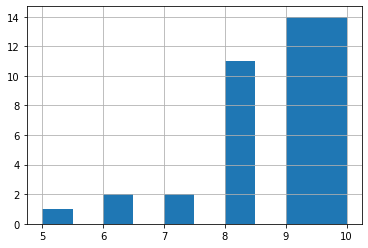

In [10]:
solutions['res_point'].hist()

В процессе я поигрался с весами.   
С текущими распределение удовлетворительно

### Добавим оценки в ноутбуки

In [11]:
def add_newline_text_to_first_cell(notebook_file_name: str, text: str) -> None:
    with open(notebook_file_name, 'r') as f:
        json_ = json.load(f)
        
    if not text in json_['cells'][0]['source']:
        json_['cells'][0]['source'] += f'\n{text}'
    
    with open(notebook_file_name, 'w') as f:
        json.dump(json_, f)
    

In [12]:
for file_name in solution_file_names:
    res_text = get_solution_data(file_name, POINT_WEIGHTS)['res_text']
    add_newline_text_to_first_cell(file_name, res_text)

### Сгенерируем комментарии в степик

In [33]:
def get_review_comment_text(solutions: pd.DataFrame, solution_id: int):
    file_name = solutions.loc[
        solutions['solution_id'] == '586343437', 'notebook_data_file_name'
    ].item()
    review_url = f'https://github.com/dvvolynkin/PandasWorkshopHWReview/blob/master/{file_name}'
    return f'Ссылка на ревью: {review_url}'

In [35]:
print(get_review_comment_text(solutions, '586343437'))

Ссылка на ревью: https://github.com/dvvolynkin/PandasWorkshopHWReview/blob/master/00_586343437_finished.ipynb
